<a href="https://colab.research.google.com/github/DevashishX/AbstractClustering/blob/master/Devashish_word2vec_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !pip install chakin
# import chakin
# chakin.search(lang='English')
# chakin.download(number=11, save_dir='./')
# !unzip glove.6B.zip

#START EXEC FROM HERE

In [2]:
!wget https://github.com/DevashishX/AbstractClustering/blob/master/glove.6B.50d.7z?raw=true; mv glove.6B.50d.7z?raw=true glove.6B.50d.7z; pwd; ls -alFh

--2020-02-22 18:20:35--  https://github.com/DevashishX/AbstractClustering/blob/master/glove.6B.50d.7z?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/DevashishX/AbstractClustering/raw/master/glove.6B.50d.7z [following]
--2020-02-22 18:20:35--  https://github.com/DevashishX/AbstractClustering/raw/master/glove.6B.50d.7z
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DevashishX/AbstractClustering/master/glove.6B.50d.7z [following]
--2020-02-22 18:20:36--  https://raw.githubusercontent.com/DevashishX/AbstractClustering/master/glove.6B.50d.7z
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:

In [3]:
!7z e glove.6B.50d.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 57132207 bytes (55 MiB)

Extracting archive: glove.6B.50d.7z
--
Path = glove.6B.50d.7z
Type = 7z
Physical Size = 57132207
Headers Size = 138
Method = LZMA2:26
Solid = -
Blocks = 1

  0%      7% - glove.6B.50d.txt                        14% - glove.6B.50d.txt                        21% - glove.6B.50d.txt                        29% - glove.6B.50d.txt                        34% - glove.6B.50d.txt                        40% - glove.6B.50d.txt                      

In [4]:
!wget https://github.com/DevashishX/AbstractClustering/blob/master/glove.names.7z?raw=true; mv glove.names.7z?raw=true glove.names.7z; pwd; ls -alFh

--2020-02-22 18:20:45--  https://github.com/DevashishX/AbstractClustering/blob/master/glove.names.7z?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/DevashishX/AbstractClustering/raw/master/glove.names.7z [following]
--2020-02-22 18:20:45--  https://github.com/DevashishX/AbstractClustering/raw/master/glove.names.7z
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DevashishX/AbstractClustering/master/glove.names.7z [following]
--2020-02-22 18:20:45--  https://raw.githubusercontent.com/DevashishX/AbstractClustering/master/glove.names.7z
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443..

In [5]:
!7z e glove.names.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 1594326 bytes (1557 KiB)

Extracting archive: glove.names.7z
--
Path = glove.names.7z
Type = 7z
Physical Size = 1594326
Headers Size = 138
Method = LZMA2:22
Solid = -
Blocks = 1

  0%    Everything is Ok

Size:       3356474
Compressed: 1594326


In [0]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from sklearn import cluster, datasets
import numpy as np
import json
import sys
import codecs
# from nltk.corpus import wordnet
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import gensim
from gensim.models import KeyedVectors


In [0]:
mpl.rcParams['toolbar'] = 'None'

wvmodel = None

# make False to switch to wordvectors
use_wordnet = False

glovemodelFile = 'glove.6B.50d.txt'
modelFile = "convertedGlove.model"

cache = {}

In [8]:
gensim.scripts.glove2word2vec.glove2word2vec(glovemodelFile, modelFile)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(400000, 50)

In [0]:
# def _mk_synset(w):
#     #
#     # turn cat.n.01 into the Synset object form
#     #
#     word = w.strip()
#     if '.' in word:
#         return wordnet.synset(word)
#     else:
#         print(' * Error, invalid synset name', w, 'skipping...')
#         return None

# def _mk_wv_word(s):
#     #
#     # turn wordnet Synset into word2vec word form
#     #   e.g. cat.n.01 -> 'cat'
#     #   e.g. free_trade.n.01 -> free-trade
#     return s.lemmas()[0].name().replace('_', '-')

In [0]:
def load_tags(filename):
    with codecs.open(filename, 'rb', 'utf-8') as tagfile:
        lines = [line[:-1] for line in tagfile.readlines() if not line.startswith('#')]
        print(lines)
        # data = [_mk_synset(w) for w in lines if _mk_synset(w)]
        # print(' *', 'loaded', len(data), 'wordnet senses,', len(lines) - len(data), 'rejected')
        data = lines
        print("loaded tags with length: ", len(data))
        return data

In [0]:
#
# wordvectors similarity distance
#

def wv(w1, w2, t):
    # lazy load the wordvector model...
    global wvmodel
    if wvmodel == None:
        print(' *', 'loading wordvector model (', modelFile, ')...')
        wvmodel = KeyedVectors.load_word2vec_format(modelFile, binary=False)
        wvmodel.init_sims(replace=True)  # no more updates, prune memory

    try:
        #
        # since we've got wordnet synset objects (like cat.n.01), we
        # must turn this back into a regular word ('cat') because the
        # word vector GloVe models are plain words with spaces turned
        # into hyphens on phrases (e.g. climate-change, black-and-white)
        #
        # wv_w1, wv_w2 = _mk_wv_word(w1), _mk_wv_word(w2)
        wv_w1, wv_w2 = w1, w2
        distance = wvmodel.similarity(wv_w1, wv_w2)
        return distance if abs(distance) >= t else 0
    except:
        return 0


In [0]:
# #
# # wordnet wup similarity distance
# #


# def wup(w1, w2, t):
#     distance = w1.wup_similarity(w2)
#     if distance:
#         if distance >= t:
#             return distance
#     return 0

# #
# # wordnet path similarity distancewv
# #


# def path(w1, w2, t):
#     distance = w1.path_similarity(w2)
#     if distance:
#         if distance >= t:
#             return distance
#     return 0

#
# Normalized distance between any two words as represented
# by wordnet synsets
#


In [0]:
def word_to_word_distance(w1, w2, t):
    if w1 == w2:
        return 1.0
    else:
        global cache
        s = sorted([w1, w2])
        x = (s[0], s[1])
        if x in cache:
            return cache[x]
        else:
            distances = []
            # scale threshold between wm and wv
            distances.append(wv(w1, w2, t / 2.5))
            d = sum(distances) / len(distances)
            cache[x] = d
            return d


def make_data_matrix(words, t):
    print("Making Data Matrix")
    list_of_vectors = []
    for word_x in words:
        wordvector = []
        for word_y in words:
            wordvector.append(word_to_word_distance(word_x, word_y, t))
        list_of_vectors.append(wordvector)

    data = np.array(np.array(list_of_vectors))
    labels = words
    print("Data Matrix Done")
    return (data, labels)


In [0]:
def show_histogram(d):
    plt.figure(figsize=(16,8))
    c = {k: len(d[k]) for k in d.keys()}
    bars, heights = zip(*c.items())
    y_pos = range(len(bars))
    plt.bar(y_pos, heights)
    plt.xticks(y_pos, bars, rotation=90)
    plt.show()

In [0]:
def word_cluster(data, labels, k, show_histogram_plot=False):
    print("Clustering...")
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    print("k_means.fit(data) Done!")

    # for i, label in enumerate(labels):
    #    print ' *', label, k_means.labels_[i]

    d = defaultdict(list)
    for c, l in zip(k_means.labels_, labels):
        d['cluster' + str(c)].append(l)

    fname = 'res'
    fname += "_wn" if use_wordnet else "_wv"
    fname += '_k' + str(k) + '.json'

    with codecs.open(fname, 'wb', 'utf-8') as outfile:
        print("Writing JSON")
        outfile.write(json.dumps(d, indent=True))
        print(' * saved results to:', fname)
        # create histogram of cluster sizes
        if show_histogram_plot:
            print("Show plot")
            show_histogram(d)

In [16]:
f = "glove.80.names.txt"
k = 100
t = 0.7

words = load_tags(f)

print(' *', 'generating dataset...')
data, labels = make_data_matrix(words, t)




['the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s", 'for', '-', 'that', 'on', 'is', 'was', 'said', 'with', 'he', 'as', 'it', 'by', 'at', '(', ')', 'from', 'his', "''", '``', 'an', 'be', 'has', 'are', 'have', 'but', 'were', 'not', 'this', 'who', 'they', 'had', 'i', 'which', 'will', 'their', ':', 'or', 'its', 'one', 'after', 'new', 'been', 'also', 'we', 'would', 'two', 'more', "'", 'first', 'about', 'up', 'when', 'year', 'there', 'all', '--', 'out', 'she', 'other', 'people', "n't", 'her', 'percent', 'than', 'over', 'into', 'last', 'some', 'government', 'time', '$', 'you', 'years', 'if', 'no', 'world', 'can', 'three', 'do', ';', 'president', 'only', 'state', 'million', 'could', 'us', 'most', '_', 'against', 'u.s.', 'so', 'them', 'what', 'him', 'united', 'during', 'before', 'may', 'since', 'many', 'while', 'where', 'states', 'because', 'now', 'city', 'made', 'like', 'between', 'did', 'just', 'national', 'day', 'country', 'under', 'such', 'second', 'then', 'company', 'group', 'any', 

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Data Matrix Done


 * clustering...
Clustering...
k_means.fit(data) Done!
Writing JSON
 * saved results to: res_wv_k100.json
Show plot


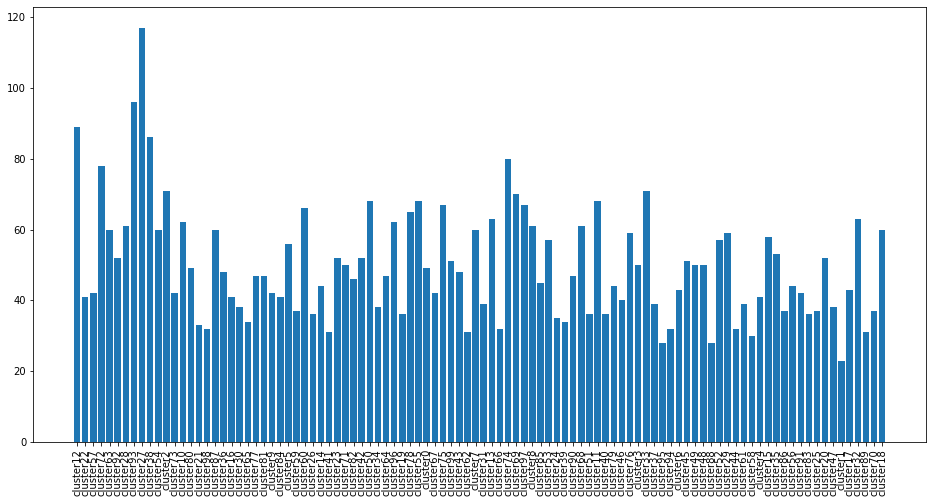

In [17]:
print(' *', 'clustering...')
word_cluster(data, labels, k=k, show_histogram_plot=True)